In [1]:
import rfpimp
import pandas as pd 
from datetime import datetime
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Data Cleaning

In [2]:
df = pd.read_csv("gamesdata.csv")

In [3]:
df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,overall_score
0,1/15/1967,1966,Superbowl,True,Green Bay Packers,35.0,10.0,Kansas City Chiefs,GB,-14.0,NaN,Los Angeles Memorial Coliseum,True,54.0,7.0,90.0,NaN,45.0
1,1/14/1968,1967,Superbowl,True,Green Bay Packers,33.0,14.0,Oakland Raiders,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74.0,NaN,47.0
2,1/12/1969,1968,Superbowl,True,Baltimore Colts,7.0,16.0,New York Jets,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80.0,Rain,23.0
3,1/11/1970,1969,Superbowl,True,Kansas City Chiefs,23.0,7.0,Minnesota Vikings,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84.0,Rain,30.0
4,1/17/1971,1970,Superbowl,True,Baltimore Colts,16.0,13.0,Dallas Cowboys,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60.0,NaN,29.0


In [4]:
schedule_date = []
home = []
away = []
score = []
temp = []
wind = []
humidity = []

for k, row in df.iterrows():
    schedule_date.append(row['schedule_date'])
    schedule_date.append(row['schedule_date'])
    home.append(1)
    home.append(0)
    away.append(0)
    away.append(1)
    score.append(row['score_home'])
    score.append(row['score_away'])
    temp.append(row['weather_temperature'])
    temp.append(row['weather_temperature'])
    wind.append(row['weather_wind_mph'])
    wind.append(row['weather_wind_mph'])
    humidity.append(row['weather_humidity'])
    humidity.append(row['weather_humidity'])
    
    
team_df_data = {'home': home, 'away': away, 'schedule_date': schedule_date, 'score': score, 'temp': temp, 'wind_mph': wind, 'humidity': humidity}
    
df_new_t = pd.DataFrame(team_df_data)
df_new_t

,home,away,schedule_date,score,temp,wind_mph,humidity
0,1,0,1/15/1967,35.0,54.0,7.0,90.0
1,0,1,1/15/1967,10.0,54.0,7.0,90.0
2,1,0,1/14/1968,33.0,60.0,12.0,74.0
3,0,1,1/14/1968,14.0,60.0,12.0,74.0
4,1,0,1/12/1969,7.0,66.0,12.0,80.0
...,...,...,...,...,...,...,...
21501,0,1,1/30/2022,27.0,41.0,4.0,41.0
21502,1,0,1/30/2022,20.0,72.0,0.0,NaN
21503,0,1,1/30/2022,17.0,72.0,0.0,NaN
21504,1,0,2/13/2022,NaN,72.0,0.0,NaN


In [5]:
df_new_t['score'] = df_new_t['score'].fillna(0)


In [6]:
import math
median_humidity = math.floor(df_new_t.humidity.median())
median_humidity

68

In [7]:
df_new_t.humidity = df_new_t.humidity.fillna(median_humidity)

In [8]:
df_new_t

,home,away,schedule_date,score,temp,wind_mph,humidity
0,1,0,1/15/1967,35.0,54.0,7.0,90.0
1,0,1,1/15/1967,10.0,54.0,7.0,90.0
2,1,0,1/14/1968,33.0,60.0,12.0,74.0
3,0,1,1/14/1968,14.0,60.0,12.0,74.0
4,1,0,1/12/1969,7.0,66.0,12.0,80.0
...,...,...,...,...,...,...,...
21501,0,1,1/30/2022,27.0,41.0,4.0,41.0
21502,1,0,1/30/2022,20.0,72.0,0.0,68.0
21503,0,1,1/30/2022,17.0,72.0,0.0,68.0
21504,1,0,2/13/2022,0.0,72.0,0.0,68.0


In [9]:
df_new_t['schedule_date'] = pd.to_datetime(df_new_t['schedule_date'])
df_new_t

,home,away,schedule_date,score,temp,wind_mph,humidity
0,1,0,1967-01-15,35.0,54.0,7.0,90.0
1,0,1,1967-01-15,10.0,54.0,7.0,90.0
2,1,0,1968-01-14,33.0,60.0,12.0,74.0
3,0,1,1968-01-14,14.0,60.0,12.0,74.0
4,1,0,1969-01-12,7.0,66.0,12.0,80.0
...,...,...,...,...,...,...,...
21501,0,1,2022-01-30,27.0,41.0,4.0,41.0
21502,1,0,2022-01-30,20.0,72.0,0.0,68.0
21503,0,1,2022-01-30,17.0,72.0,0.0,68.0
21504,1,0,2022-02-13,0.0,72.0,0.0,68.0


In [10]:
df_new_t['schedule_date'] = df_new_t['schedule_date'].dt.year

In [11]:
df = df_new_t.fillna(0)
df_home = df.loc[df['home']==1]
df_away = df.loc[df['away']==1]
df_away

,home,away,schedule_date,score,temp,wind_mph,humidity
1,0,1,1967,10.0,54.0,7.0,90.0
3,0,1,1968,14.0,60.0,12.0,74.0
5,0,1,1969,16.0,66.0,12.0,80.0
7,0,1,1970,7.0,55.0,14.0,84.0
9,0,1,1971,13.0,59.0,11.0,60.0
...,...,...,...,...,...,...,...
21497,0,1,2022,36.0,35.0,6.0,54.0
21499,0,1,2022,30.0,50.0,11.0,69.0
21501,0,1,2022,27.0,41.0,4.0,41.0
21503,0,1,2022,17.0,72.0,0.0,68.0


## Feature Ranking Home

In [12]:
features = ['home','schedule_date', 'score','temp','wind_mph','humidity']

In [13]:
df_train, df_test = train_test_split(df_home, test_size=0.20)
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('score',axis=1), df_train['score']
X_test, y_test = df_test.drop('score',axis=1), df_test['score']

In [14]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [15]:
imp = rfpimp.importances(rf, X_test, y_test)

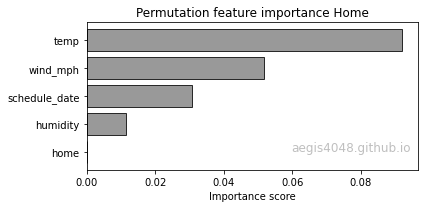

In [16]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance Home')
ax.text(0.8, 0.15, 'aegis4048.github.io', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()

fig.tight_layout()

## Feature Ranking Away

In [32]:
features = ['away','schedule_date', 'score','temp','wind_mph','humidity']

In [33]:
df_train2, df_test2 = train_test_split(df_away, test_size=0.20)
df_train2 = df_train2[features]
df_test2 = df_test2[features]

X_train2, y_train2 = df_train2.drop('score',axis=1), df_train2['score']
X_test2, y_test2 = df_test2.drop('score',axis=1), df_test2['score']

In [34]:
rf2 = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf2.fit(X_train2, y_train2)

RandomForestRegressor(n_jobs=-1)

In [35]:
imp2 = rfpimp.importances(rf2, X_test2, y_test2)

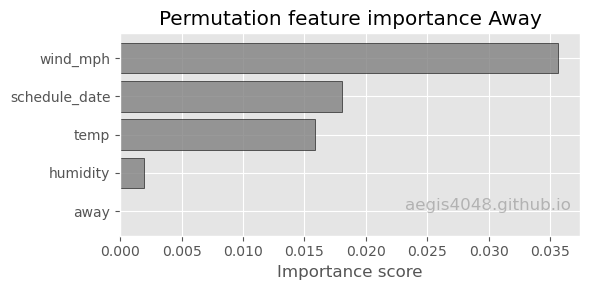

In [36]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp2.index, imp2['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance Away')
ax.text(0.8, 0.15, 'aegis4048.github.io', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()

fig.tight_layout()

## 3d Vis AWAY

In [22]:
X = df_away[['temp', 'wind_mph']].values.reshape(-1,2)
Y = df_away['score']

In [23]:
x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0, 50,30)   
y_pred = np.linspace(0, 50, 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [24]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

In [25]:
r2 = model.score(X, Y)

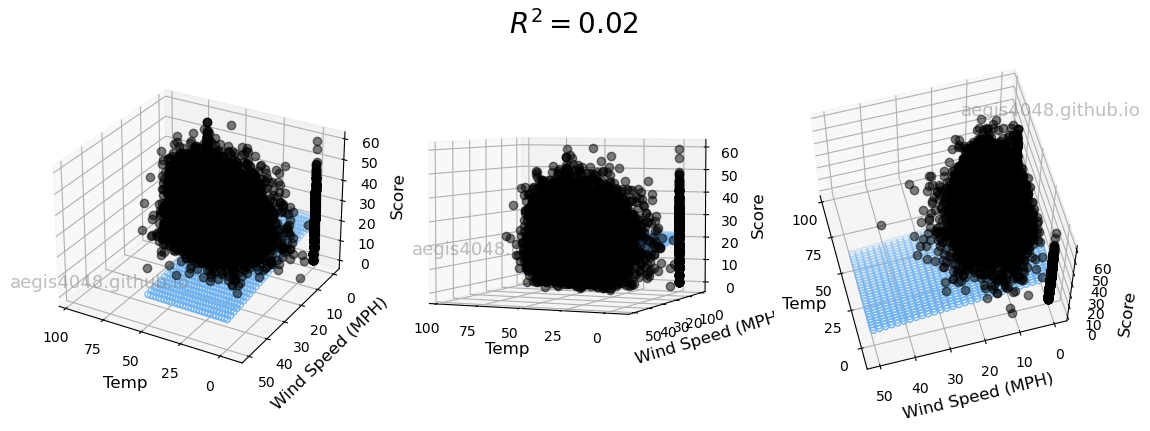

In [26]:
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Temp', fontsize=12)
    ax.set_ylabel('Wind Speed (MPH)', fontsize=12)
    ax.set_zlabel('Score', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

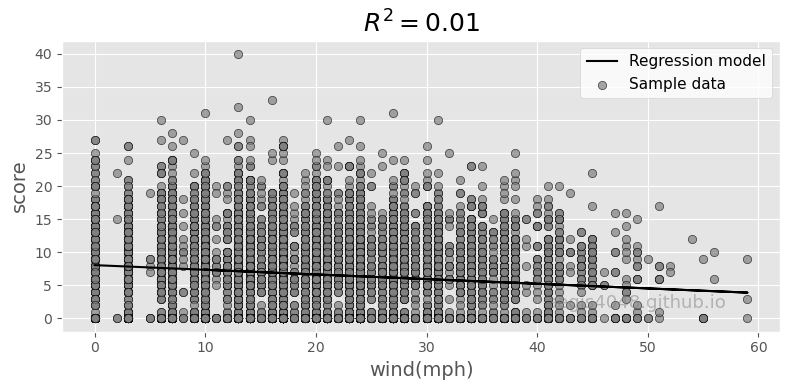

In [27]:
X_reg = df_away['score'].values.reshape(-1,1)
y_reg = df_away['wind_mph'].values


ols = linear_model.LinearRegression()
model = ols.fit(X_reg, y_reg)
response = model.predict(X_reg)

r2 = model.score(X_reg, y_reg)

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_reg, response, color='k', label='Regression model')
ax.scatter(X_reg, y_reg, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('score', fontsize=14)
ax.set_xlabel('wind(mph)', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

# Summary

In [28]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     84.13
Date:                Sun, 22 May 2022   Prob (F-statistic):           5.59e-37
Time:                        23:08:26   Log-Likelihood:                -40029.
No. Observations:               10753   AIC:                         8.006e+04
Df Residuals:                   10750   BIC:                         8.009e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.7613      0.290     71.533      0.0

In [29]:
X_reg2 = sm.add_constant(X_reg)
est2 = sm.OLS(y_reg, X_reg2)
est3 = est2.fit()
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     160.5
Date:                Sun, 22 May 2022   Prob (F-statistic):           1.58e-36
Time:                        23:08:26   Log-Likelihood:                -34174.
No. Observations:               10753   AIC:                         6.835e+04
Df Residuals:                   10751   BIC:                         6.837e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0608      0.125     64.657      0.0